### lab-5 linear regression / Линейная регрессия
Мисюрина Ирина

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Датасет должен содержать как минимум количественные признаки. Если категориальных нет, то пропустить пункты с временным убиранием категориальных признаков. Желательно наличие обоих типов признаков в датасете.

In [1]:
!wget https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/diamonds.csv

--2024-06-27 16:40:54--  https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2772143 (2.6M) [text/plain]
Saving to: ‘diamonds.csv’

diamonds.csv        100%[===================>]   2.64M  --.-KB/s    in 0.05s   

2024-06-27 16:40:55 (57.8 MB/s) - ‘diamonds.csv’ saved [2772143/2772143]



In [3]:
import pandas as pd
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. Датасет и подготовка данных, этап 1:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Нормализовать численные данные.
   - Визуализировать `heatmap`-матрицу кореллированности признаков.
   - Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas.plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции).
   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).

   - Привести описание датасета.

|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|carat|масса|карат|
|cut|огранка|категория (средняя, хорошая, очень хорошая, премиум, идеальная)
|color|цвет|категория|
|clarity|прозрачность|категория|
|depth|высота|мм|
|table|ширина|мм|
|price|цена|у.е. (скорее всего доллары)|
|x|геометрия по оси x|мм|
|y|геометрия по оси y|мм|
|z|геометрия по оси z|мм|

   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".

In [4]:
#no null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


   - Нормализовать численные данные.

Будем предсказывать price

In [5]:
y = df['price']
X = df.drop(['price'], axis=1)

In [6]:
#уберем последний признак, так как он по сути закодированный категориальный
numeric = [X.columns[i] for i in range(X.shape[1]) if X.dtypes[X.columns[i]] != 'object']
numeric

['carat', 'depth', 'table', 'x', 'y', 'z']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[numeric])
X_scaled = X.copy()
X_scaled[numeric] = scaler.transform(X[numeric])
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.198168,Ideal,E,SI2,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,Premium,E,SI1,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,Good,E,VS1,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,Premium,I,VS2,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,Good,J,SI2,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [8]:
y = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame(y)), columns=['price'])

   - Визуализировать `heatmap`-матрицу кореллированности признаков.

<Axes: >

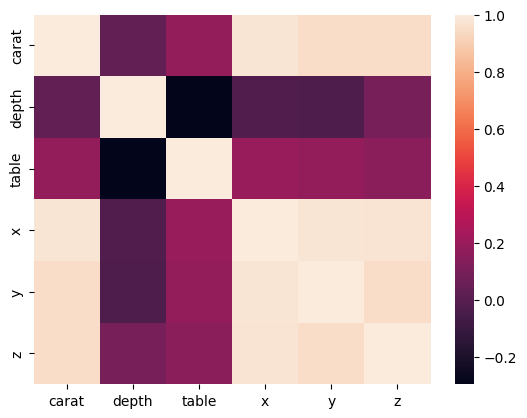

In [9]:
import seaborn as sns
sns.heatmap(X_scaled[numeric].corr())

   - Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas.plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции).

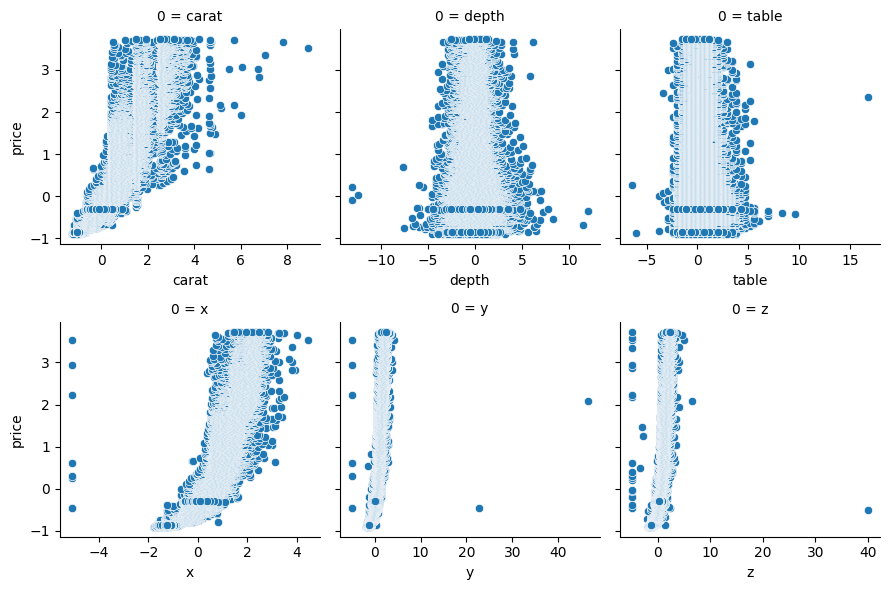

In [10]:
fig = sns.FacetGrid(pd.DataFrame(numeric), col=0, col_wrap=3, sharex=False)
for k, v in zip(fig.axes, numeric):
    sns.scatterplot(data=pd.concat([X_scaled[numeric], y], axis=1), x=v, y='price', ax=k)
fig.tight_layout()

   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)
X_train_n, X_test_n = X_train[numeric], X_test[numeric]

(37758, 1) (16182, 1)


3. Регрессия МНК:
   - Обучить модель линейной регрессии `LinearRegression`.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Вывести `model.coef_` и `model.intercept_`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

   - Обучить модель линейной регрессии `LinearRegression`.

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_n, y_train)
y_pred = model.predict(X_test_n)

   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.

In [13]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2
print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")

MSE: 0.138
MAE: 0.222
R2 score: 0.860


   - Вывести `model.coef_` и `model.intercept_`.

In [14]:
print(f'model.coef_: {model.coef_}')
print(f'model.inteercept_: {model.intercept_}')

model.coef_: [[ 1.25906312 -0.07188593 -0.05795292 -0.34993853  0.00925999  0.00798365]]
model.inteercept_: [0.00097502]


   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

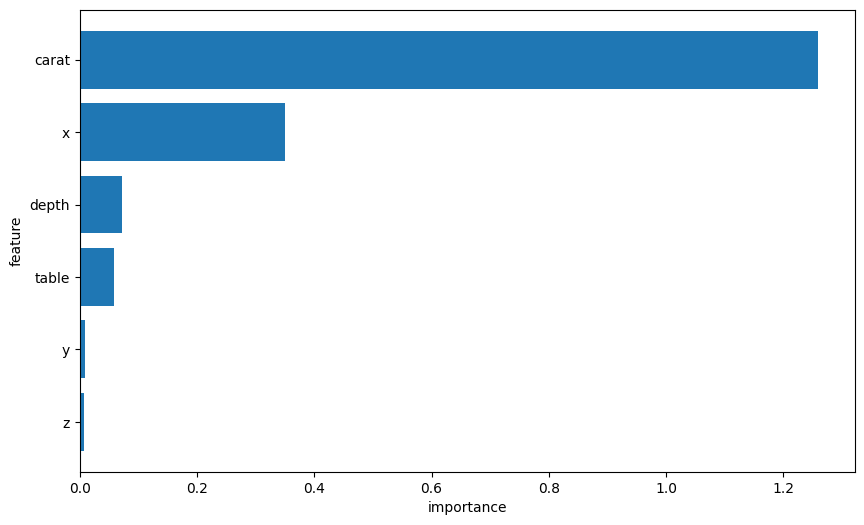

In [16]:
import numpy as np
import matplotlib.pyplot as plt

coefficients = model.coef_[0]
feature_names = numeric
sorted = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted], np.abs(coefficients)[sorted])
plt.xlabel('importance')
plt.ylabel('feature')
plt.gca().invert_yaxis()
plt.show()

4. Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`):
   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).  
   
   > Запомнить лучшие модели для 2 этапа.

   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import warnings
warnings.filterwarnings("ignore")

grid_ridge_lasso = {'alpha': np.arange(0.1, 4, 0.2)}
ridge = Ridge()
search_ridge = GridSearchCV(ridge, grid_ridge_lasso)
search_ridge.fit(X_train_n, y_train)
lasso = Lasso()
search_lasso = GridSearchCV(lasso, grid_ridge_lasso)
search_lasso.fit(X_train_n, y_train)

grid_elastic_net = {'alpha': np.arange(0.1, 4, 0.2), 'l1_ratio': [0.25, 0.5, 0.75]}
elastic_net = ElasticNet()
search_elastic_net = GridSearchCV(elastic_net, grid_elastic_net)
search_elastic_net.fit(X_train_n, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9]),
                         'l1_ratio': [0.25, 0.5, 0.75]})

   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).

In [18]:
print(f'best ridge: {search_ridge.best_params_}')
print(f'best lasso: {search_lasso.best_params_}')
print(f'best elastic net: {search_elastic_net.best_params_}')

best ridge: {'alpha': 3.900000000000001}
best lasso: {'alpha': 0.1}
best elastic net: {'alpha': 0.1, 'l1_ratio': 0.75}


In [19]:
best_ridge = search_ridge.best_estimator_
best_lasso = search_lasso.best_estimator_
best_elastic_net = search_elastic_net.best_estimator_

In [20]:
print('ridge\n')
print(f'model.coef_: {best_ridge.coef_}')
print(f'model.inteercept_: {best_ridge.intercept_}')
print('\nlasso\n')
print(f'model.coef_: {best_lasso.coef_}')
print(f'model.inteercept_: {best_lasso.intercept_}')
print('\nelastic net\n')
print(f'model.coef_: {best_elastic_net.coef_}')
print(f'model.inteercept_: {best_elastic_net.intercept_}')

ridge

model.coef_: [[ 1.25556766 -0.07162102 -0.05793547 -0.3455287   0.0088103   0.00745209]]
model.inteercept_: [0.00097619]

lasso

model.coef_: [ 0.82329561 -0.         -0.          0.          0.          0.        ]
model.inteercept_: [0.0015196]

elastic net

model.coef_: [ 0.78342248 -0.         -0.          0.03433201  0.01252723  0.        ]
model.inteercept_: [0.00149666]


In [21]:
print('ridge\n')
y_pred = best_ridge.predict(X_test_n)
print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")

print('\nlasso\n')
y_pred = best_lasso.predict(X_test_n)
print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")

print('\nelastic net\n')
y_pred = best_elastic_net.predict(X_test_n)
print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")

ridge

MSE: 0.138
MAE: 0.222
R2 score: 0.860

lasso

MSE: 0.157
MAE: 0.243
R2 score: 0.839

elastic net

MSE: 0.158
MAE: 0.246
R2 score: 0.839


   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).  
   
   > Запомнить лучшие модели для 2 этапа.

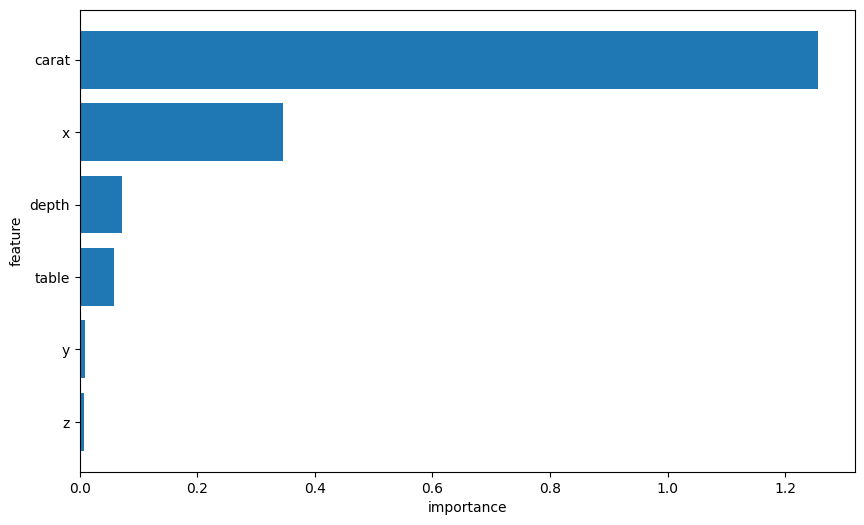

In [22]:
coefficients = best_ridge.coef_[0]
feature_names = numeric
sorted = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted], np.abs(coefficients)[sorted])
plt.xlabel('importance')
plt.ylabel('feature')
plt.gca().invert_yaxis()
plt.show()

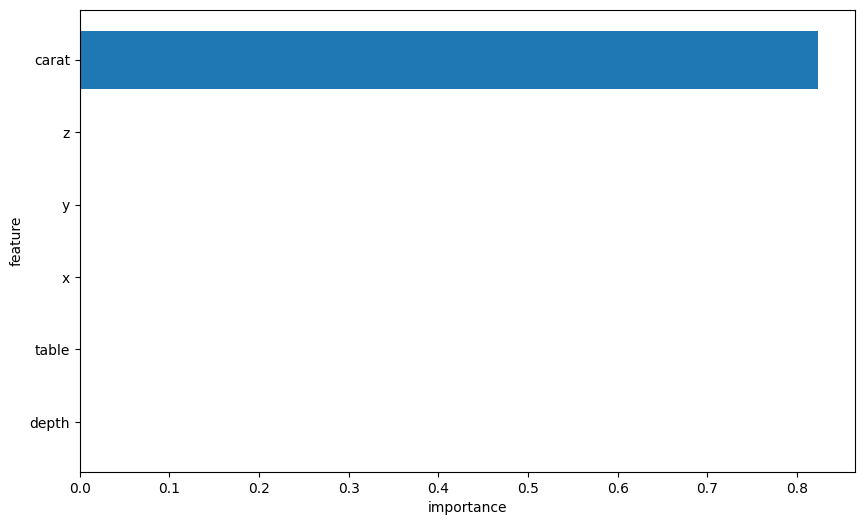

In [23]:
coefficients = best_lasso.coef_
feature_names = numeric
sorted = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted], np.abs(coefficients)[sorted])
plt.xlabel('importance')
plt.ylabel('feature')
plt.gca().invert_yaxis()
plt.show()

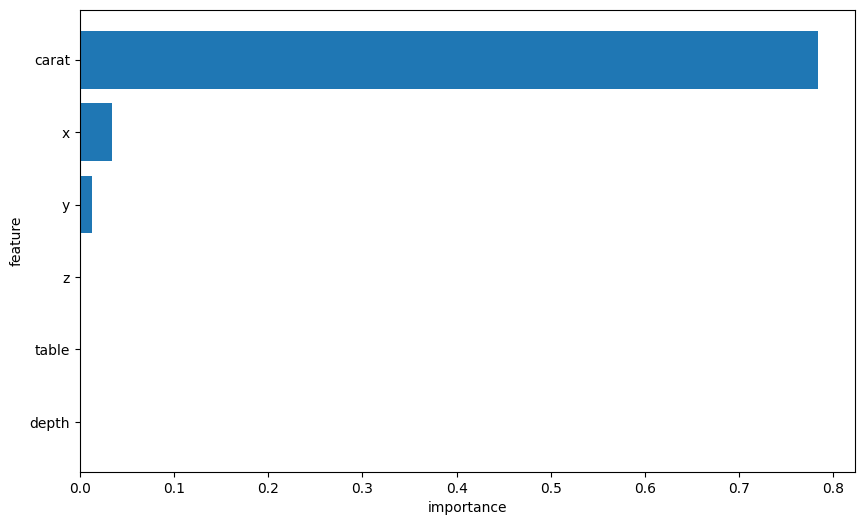

In [24]:
coefficients = best_elastic_net.coef_
feature_names = numeric
sorted = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted], np.abs(coefficients)[sorted])
plt.xlabel('importance')
plt.ylabel('feature')
plt.gca().invert_yaxis()
plt.show()

5. Датасет и подготовка данных, этап 2:
   - Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.
   - Закодировать категориальные признаки в обучающей и тестовой выборках.

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [26]:
keys, values = pd.factorize(X['cut'].unique())
d_cut = dict(zip(values, keys))
keys, values = pd.factorize(X['color'].unique())
d_color = dict(zip(values, keys))
keys, values = pd.factorize(X['clarity'].unique())
d_clarity = dict(zip(values, keys))

In [27]:
X_train['cut'] = X_train['cut'].replace(d_cut)
X_train['color'] = X_train['color'].replace(d_color)
X_train['clarity'] = X_train['clarity'].replace(d_clarity)

X_test['cut'] = X_test['cut'].replace(d_cut)
X_test['color'] = X_test['color'].replace(d_color)
X_test['clarity'] = X_test['clarity'].replace(d_clarity)

6. Регрессии, этап 2:
   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).
   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.
   - Выбрать лучшую модель.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
best_elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.75)

   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

In [29]:
print('linear regression\n')
y_pred = linear_model.predict(X_test)
print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")
print(f"model.coef_: {linear_model.coef_}")
print(f"model.intercept_: {linear_model.intercept_}")

print('\nridge\n')
y_pred = best_ridge.predict(X_test)
print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")
print(f"model.coef_: {best_ridge.coef_}")
print(f"model.intercept_: {best_ridge.intercept_}")

print('\nlasso\n')
y_pred = best_lasso.predict(X_test)
print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")
print(f"model.coef_: {best_lasso.coef_}")
print(f"model.intercept_: {best_lasso.intercept_}")

print('\nelastic net\n')
y_pred = best_elastic_net.predict(X_test)
print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")
print(f"model.coef_: {best_elastic_net.coef_}")
print(f"model.intercept_: {best_elastic_net.intercept_}")

linear regression

MSE: 0.123
MAE: 0.212
R2 score: 0.874
model.coef_: [[ 1.223533   -0.02031321  0.02096147  0.06399035 -0.05540916 -0.03372847
  -0.28848953  0.01410314  0.0116272 ]]
model.intercept_: [-0.18491521]

ridge

MSE: 0.123
MAE: 0.212
R2 score: 0.874
model.coef_: [[ 1.22020369 -0.02030621  0.02094209  0.06403426 -0.05516438 -0.03371114
  -0.28439376  0.0137363   0.01118271]]
model.intercept_: [-0.18496033]

lasso

MSE: 0.150
MAE: 0.232
R2 score: 0.847
model.coef_: [ 0.83357703 -0.          0.          0.02098687 -0.         -0.
  0.          0.          0.        ]
model.intercept_: [-0.04584407]

elastic net

MSE: 0.148
MAE: 0.233
R2 score: 0.849
model.coef_: [ 0.7763988  -0.          0.          0.03171442 -0.         -0.
  0.05267605  0.01767013  0.        ]
model.intercept_: [-0.07007878]


   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.

|Metric|Linear Regression (only num)|Linear Regression (all)|Ridge (only num)|Ridge (all)|Lasso (only num)|Lasso (all)|Eliastic Net (only num)|Eliastic Net (all)|
|------|----------------------------|-----------------------|----------------|-----------|----------------|-----------|-----------------------|------------------|
|MSE|0.138|***0.123***|0.138|*0.123*|0.157|*0.150*|0.158|*0.148*|
|MAE|0.222|***0.212***|0.222|*0.212*|0.243|*0.232*|0.246|*0.233*|
|$R^2$|0.860|***0.874***|0.860|***0.874***|0.839|***0.847***|0.839|*0.849*|

Для всех моделей добавление категориальных переменных позволило улучшить все метрики (уменьшить ошибку и увеличить $R^2$)

   - Выбрать лучшую модель.

In [30]:
best_model = linear_model

   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

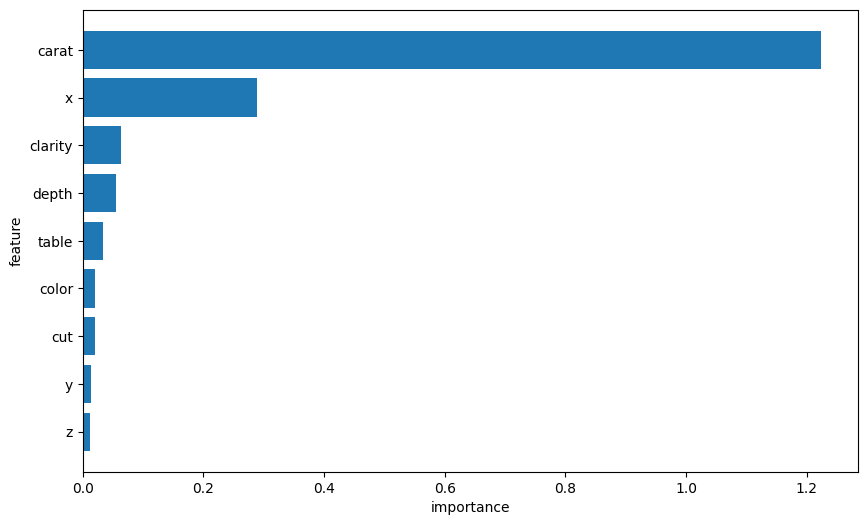

In [31]:
coefficients = best_model.coef_[0]
feature_names = X_train.columns
sorted = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted], np.abs(coefficients)[sorted])
plt.xlabel('importance')
plt.ylabel('feature')
plt.gca().invert_yaxis()
plt.show()

   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

rfe = RFE(estimator=LinearRegression(), n_features_to_select=7)
model = LinearRegression()
rf_pipeline = Pipeline(steps=[('rfe', rfe), ('model', model)])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=7)),
                ('model', LinearRegression())])

   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

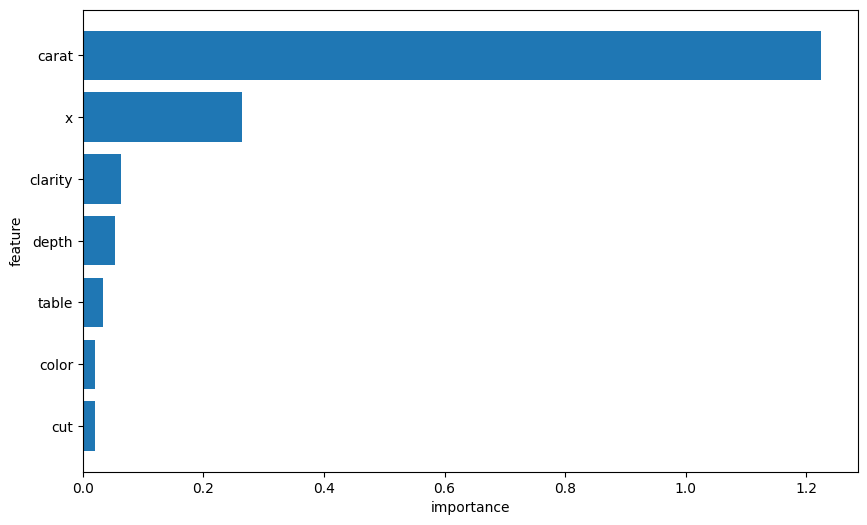

In [33]:
coefficients = model.coef_[0]
feature_names = rf_pipeline.named_steps['rfe'].get_feature_names_out()
sorted = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted], np.abs(coefficients)[sorted])
plt.xlabel('importance')
plt.ylabel('feature')
plt.gca().invert_yaxis()
plt.show()

   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

In [34]:
y_pred = rf_pipeline.predict(X_test)

print(f"MSE: {MSE(y_test, y_pred):.3f}")
print(f"MAE: {MAE(y_test, y_pred):.3f}")
print(f"R2 score: {R2(y_test, y_pred):.3f}")

MSE: 0.123
MAE: 0.212
R2 score: 0.874


7. Сделать вывод:
   - Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).
   - Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).
   - Вывод о результатах использования `Recursive Feature Elimination` (лучше или хуже - значения метрик).

Лучший без категориальных - Линейная регрессия

Лучший с категориальными - Линейная регрессия

После Recursive Feature Elimination метрики без изменений